<a href="https://colab.research.google.com/github/Michal1Dabrowski/Projects/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Jak zawartość różnych elementów wina wpływa na jego jakość/ ocenę?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/WineQT.csv')

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [ ]:
len(data)

1143

In [ ]:
data=data.drop(['Id'],axis=1)

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


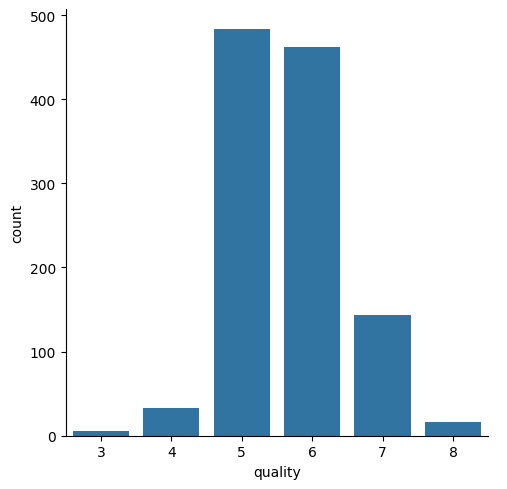

In [ ]:
sns.catplot(x="quality",data=data,kind="count")

In [ ]:
y = data['quality']
X = data[['fixed acidity']]

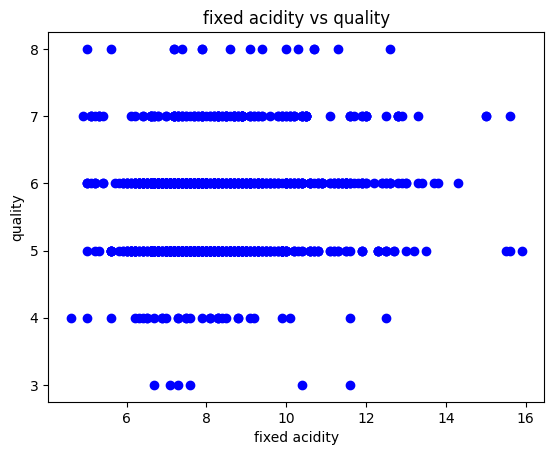

In [ ]:
plt.scatter(X,y,color='blue')
plt.title('fixed acidity vs quality')
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.show()

In [ ]:
y = data['quality']
X = data[['alcohol']]

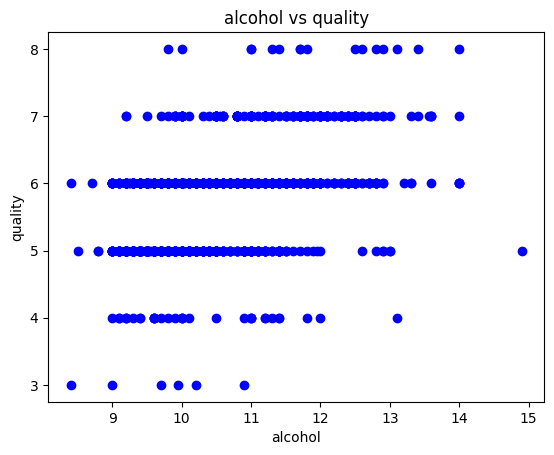

In [ ]:
plt.scatter(X,y,color='blue')
plt.title('alcohol vs quality')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

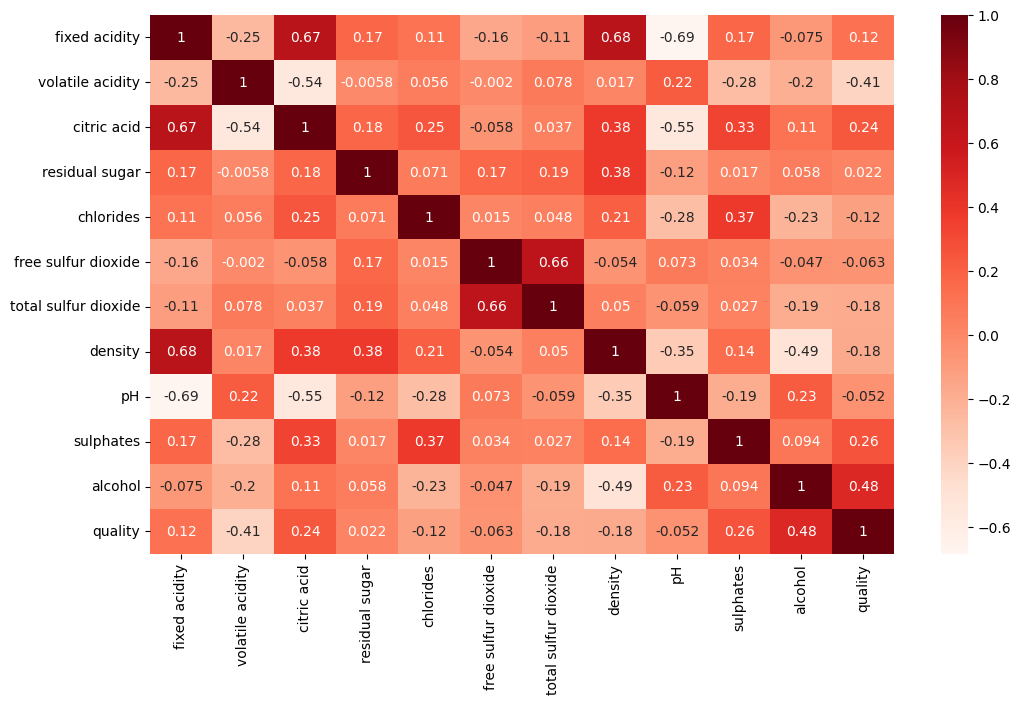

In [ ]:
import seaborn as sns
data.describe().T.style.background_gradient(cmap='Greens')
data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='Reds')
plt.show()

In [ ]:
#zmienne, które będziemy brać pod uwagę to: alcohol, sulphates, volatile acidity oraz citric acid

Text(0.5, 1.0, 'Volatile acidity vs Quality')

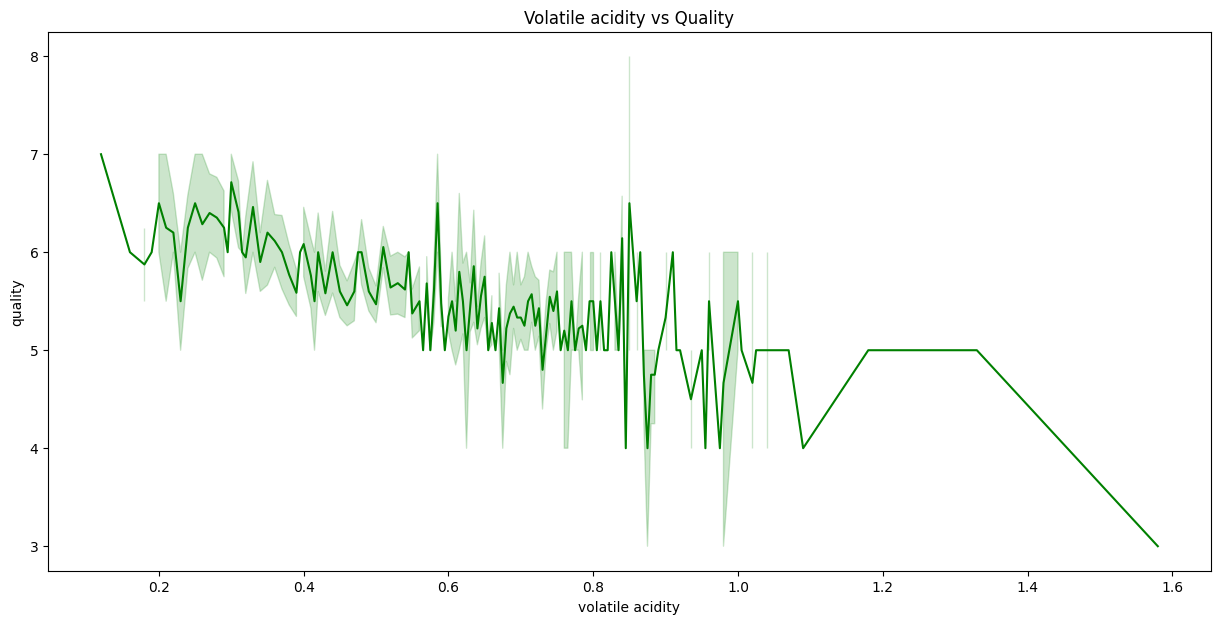

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data, x="volatile acidity",y="quality",color="g")
plt.title('Volatile acidity vs Quality')

Text(0.5, 1.0, 'Alcohol vs Quality')

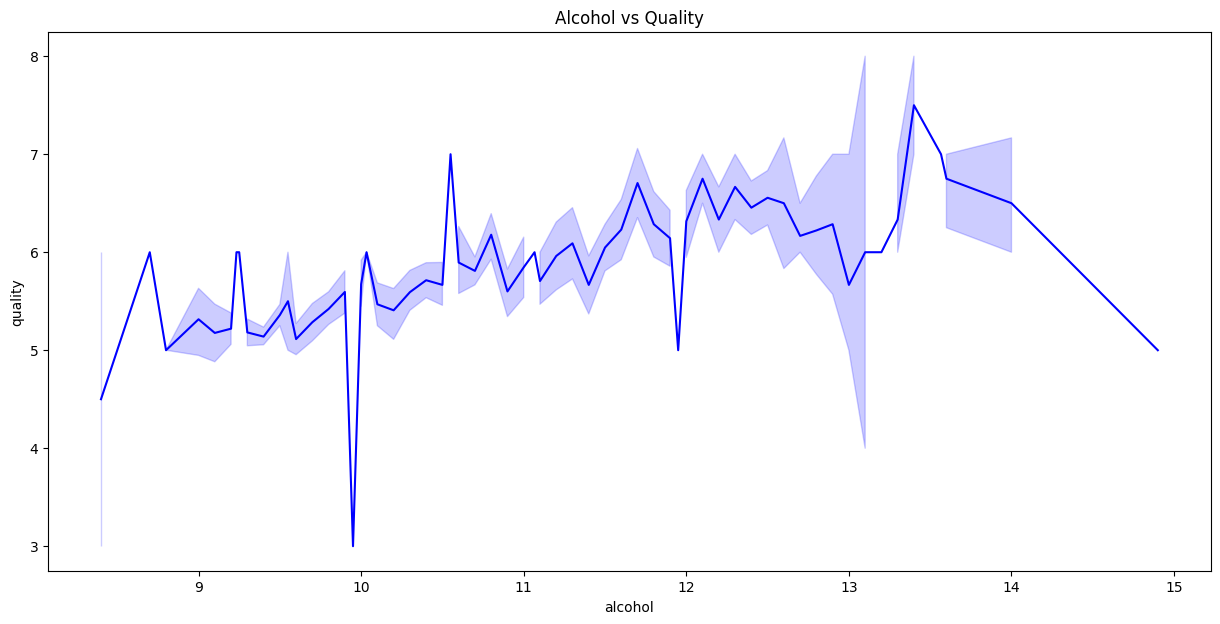

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data, x="alcohol",y="quality",color="b")
plt.title('Alcohol vs Quality')

Text(0.5, 1.0, 'Sulphates vs Quality')

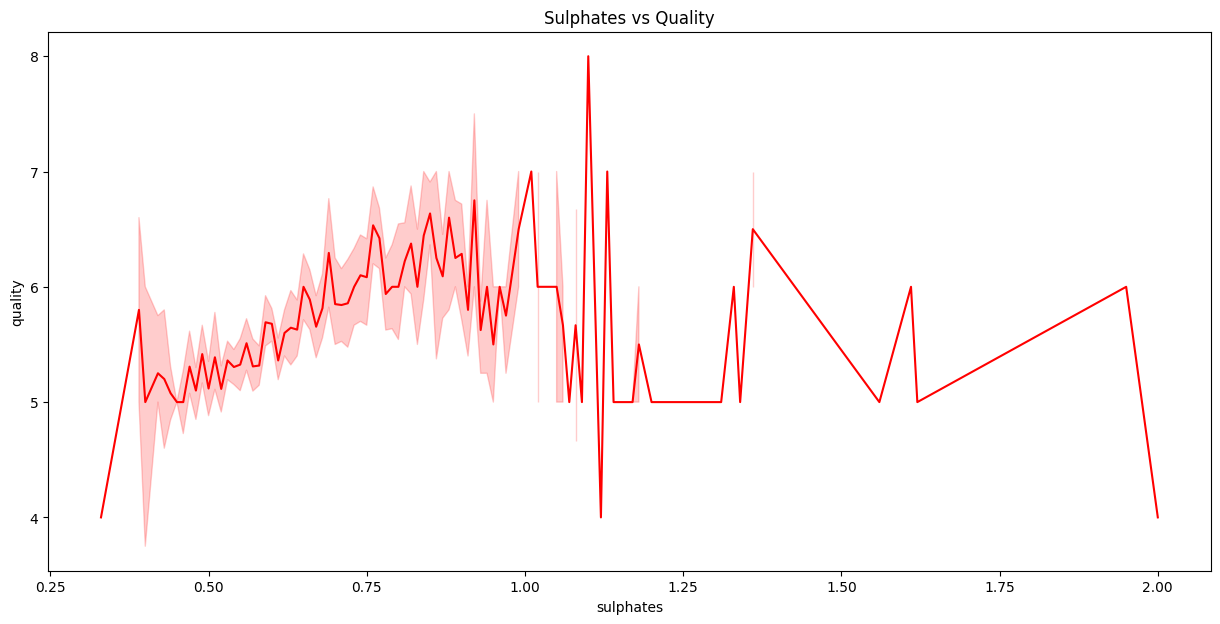

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data, x="sulphates",y="quality",color="r")
plt.title('Sulphates vs Quality')

Text(0.5, 1.0, 'Citric acid vs Quality')

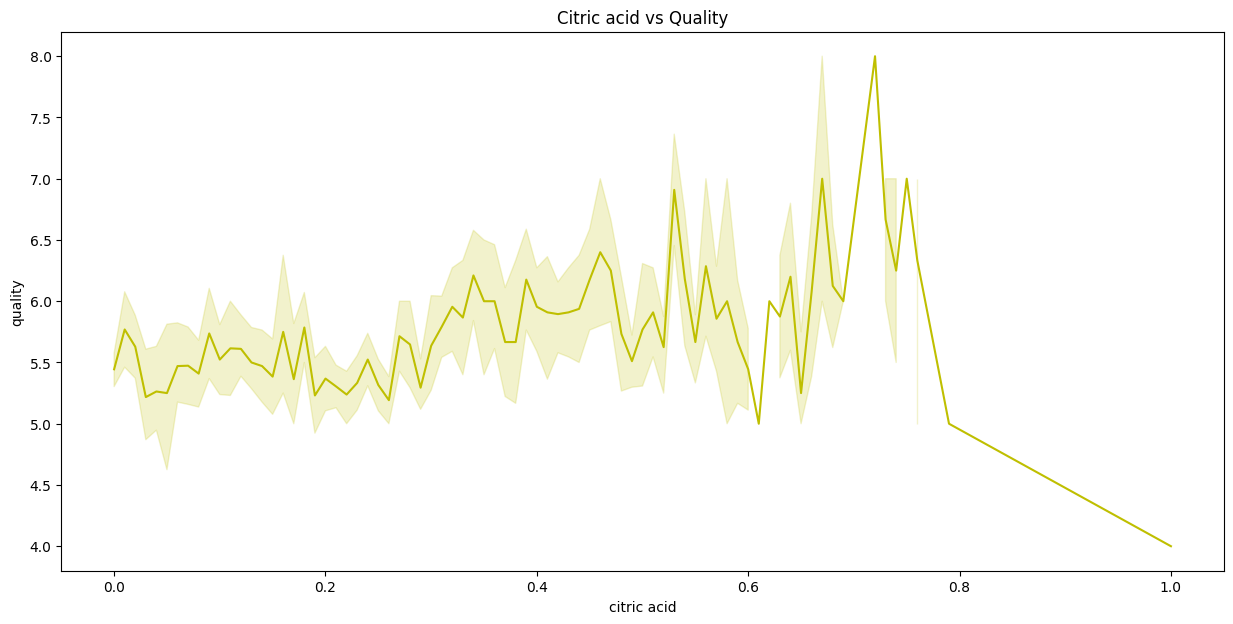

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data, x="citric acid",y="quality",color="y")
plt.title('Citric acid vs Quality')

In [ ]:
y = data['quality']
X = data[['alcohol', 'sulphates', 'volatile acidity', 'citric acid']]

In [ ]:
#tworzenie zbiorów treningowego i walidacyjnego
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=1)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
max_depths=range(1,50)
training_error = []
validation_error = []
for max_depth in max_depths:
    #budowanie modelu z różną głębokością drzewa max_depth od 1 do 49
    model_1=tree.DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X_train,y_train)
    #predykcja modelu na zbiorze treningowym
    pred_1 = model_1.predict(X_train)
    training_error.append(mean_absolute_error(y_train,pred_1))
    #predykcja modelu na zborze walidacyjnyn
    pred_2 = model_1.predict(X_val)
    validation_error.append(mean_absolute_error(y_val,pred_2))

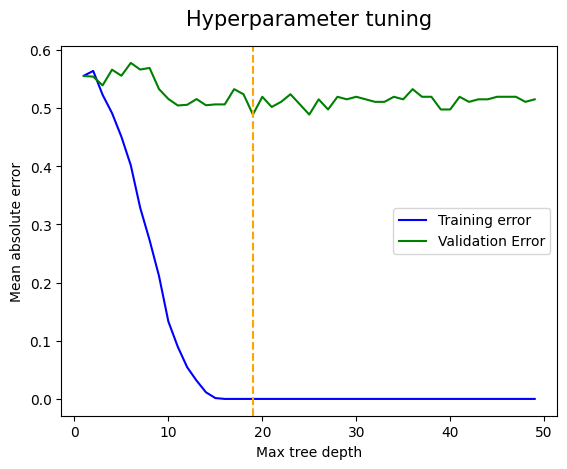

In [ ]:
#wykres liniowy pokazujący błąd szacunku na zbiorze treningowym
plt.plot(max_depths,training_error,color='blue',label='Training error')

#wykres liniowy pokazujący błąd szacunku na zbiorze walidacyjnym
plt.plot(max_depths,validation_error,color='green',label='Validation Error')

plt.xlabel('Max tree depth')

plt.ylabel('Mean absolute error')

plt.title('Hyperparameter tuning',pad=15,size=15)

plt.legend()

#pionowa linia wyznaczająca minimalny błąd szacunku na zbiorze walidayjnym
plt.axvline(x=np.argmin(validation_error)+1,color='orange',linestyle='--')

In [ ]:
np.argmin(validation_error)+1

19

In [ ]:
from sklearn.model_selection import GridSearchCV
model=DecisionTreeRegressor()
gs=GridSearchCV(
    #model - puste drzewo decyzyjne
    model,
    #parametry do optymalizacji oraz z jakich zakresów
    #max_depth - z zakresu 1-19
    #min_samples_split 10-90 i co 10
    param_grid={'max_depth':range(1,20),
                'min_samples_split':range(10,100,10)},
    #10-krotna walidacja
    cv=10,
    #miara jakości modelu -mean_absolute_error
    scoring='neg_mean_absolute_error'
    )
#w tym momencie robimy podzial na zbiór treningowy i testowy

gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_split': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
print(gs.best_params_)

#dla 'min_samples_split':range(10,60,10)' najlepsze parametry to max_depth = 4 i min_samples_split = 50
#a dla 'min_samples_split':range(10,100,10)' najlepsze parametry to max_depth = 8 i min_samples_split = 90

{'max_depth': 12, 'min_samples_split': 50}


In [ ]:
#Drzewo deyzycjne
from sklearn.tree import DecisionTreeRegressor
model_tree=DecisionTreeRegressor(max_depth=8,min_samples_split=90)
model_tree.fit(X,y)

##model - regresja liniowa
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X,y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

#sprawdź skuteczność modeli na podstawie następujących metryk:
##R^2
y_predict_tree=model_tree.predict(X_test)
y_predict_lin=model_lin.predict(X_test)
print(f'R2 Model Drzewa: {r2_score(y_test,y_predict_tree)}')
print(f'R2 Model Reg. Liniowa: {r2_score(y_test,y_predict_lin)}')

##dopasowany R^2
adj_r2_tree=1-(1-r2_score(y_test,y_predict_tree))*(len(y)-1)/(len(y)-X.shape[1]-1)
adj_r2_lin=1-(1-r2_score(y_test,y_predict_lin))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'dopasowany R2- Model Drzewa: {adj_r2_tree}')
print(f'dopasowany R2 - Model Regresja: {adj_r2_lin}')

##MAE
print(f'MAE - Model Drzewa: {mean_absolute_error(y_test,y_predict_tree)}')
print(f'MAE - Model Regresja: {mean_absolute_error(y_test,y_predict_lin)}')

##RMSE
print(f'RMSE - Model Drzewa: {mean_squared_error(y_test,y_predict_tree, squared = False)}')
print(f'RMSE - Model Regresja: {mean_squared_error(y_test,y_predict_lin, squared = False)}')

##MAPE
print(f'MAPE - Model Drzewa: {100*mean_absolute_percentage_error(y_test,y_predict_tree)}')
print(f'MAPE - Model Regresja: {100*mean_absolute_percentage_error(y_test,y_predict_lin)}')

R2 Model Drzewa: 0.3974713261930597
R2 Model Reg. Liniowa: 0.3257181338261772
dopasowany R2- Model Drzewa: 0.3953534749670248
dopasowany R2 - Model Regresja: 0.3233480745426137
MAE - Model Drzewa: 0.4529160421899596
MAE - Model Regresja: 0.47788199875272597
RMSE - Model Drzewa: 0.5790431174670915
RMSE - Model Regresja: 0.61255174907154
MAPE - Model Drzewa: 8.122608724051798
MAPE - Model Regresja: 8.612261683240877


In [ ]:
# dla max depth 4, min samples split 50

# R2 Model Drzewa: 0.3687313600206108
# R2 Model Reg. Liniowa: 0.3257181338261772
# dopasowany R2- Model Drzewa: 0.3665124895813159
# dopasowany R2 - Model Regresja: 0.3233480745426137
# MAE - Model Drzewa: 0.4888409359781648
# MAE - Model Regresja: 0.47788199875272597
# RMSE - Model Drzewa: 0.5926921180148249
# RMSE - Model Regresja: 0.61255174907154
# MAPE - Model Drzewa: 8.747054578595943
# MAPE - Model Regresja: 8.612261683240877

In [ ]:
# dla max depth 8, min samples split 90

# R2 Model Drzewa: 0.3974713261930597 jak dużo zmienności ratingu wina jest wyjaśniony przez model
# R2 Model Reg. Liniowa: 0.3257181338261772
# dopasowany R2- Model Drzewa: 0.3953534749670248
# dopasowany R2 - Model Regresja: 0.3233480745426137
# MAE - Model Drzewa: 0.4529160421899596
# MAE - Model Regresja: 0.47788199875272597
# RMSE - Model Drzewa: 0.5790431174670915
# RMSE - Model Regresja: 0.61255174907154
# MAPE - Model Drzewa: 8.122608724051798
# MAPE - Model Regresja: 8.612261683240877

[Text(0.5096153846153846, 0.9444444444444444, 'alcohol <= 10.525\nsquared_error = 0.649\nsamples = 1143\nvalue = 5.657'),
 Text(0.3076923076923077, 0.8333333333333334, 'sulphates <= 0.635\nsquared_error = 0.433\nsamples = 698\nvalue = 5.378'),
 Text(0.19230769230769232, 0.7222222222222222, 'volatile acidity <= 0.652\nsquared_error = 0.333\nsamples = 441\nvalue = 5.234'),
 Text(0.11538461538461539, 0.6111111111111112, 'citric acid <= 0.025\nsquared_error = 0.319\nsamples = 309\nvalue = 5.314'),
 Text(0.07692307692307693, 0.5, 'squared_error = 0.427\nsamples = 30\nvalue = 5.8'),
 Text(0.15384615384615385, 0.5, 'alcohol <= 9.75\nsquared_error = 0.279\nsamples = 279\nvalue = 5.262'),
 Text(0.07692307692307693, 0.3888888888888889, 'alcohol <= 8.7\nsquared_error = 0.231\nsamples = 170\nvalue = 5.147'),
 Text(0.038461538461538464, 0.2777777777777778, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.11538461538461539, 0.2777777777777778, 'sulphates <= 0.585\nsquared_error = 0.205\nsam

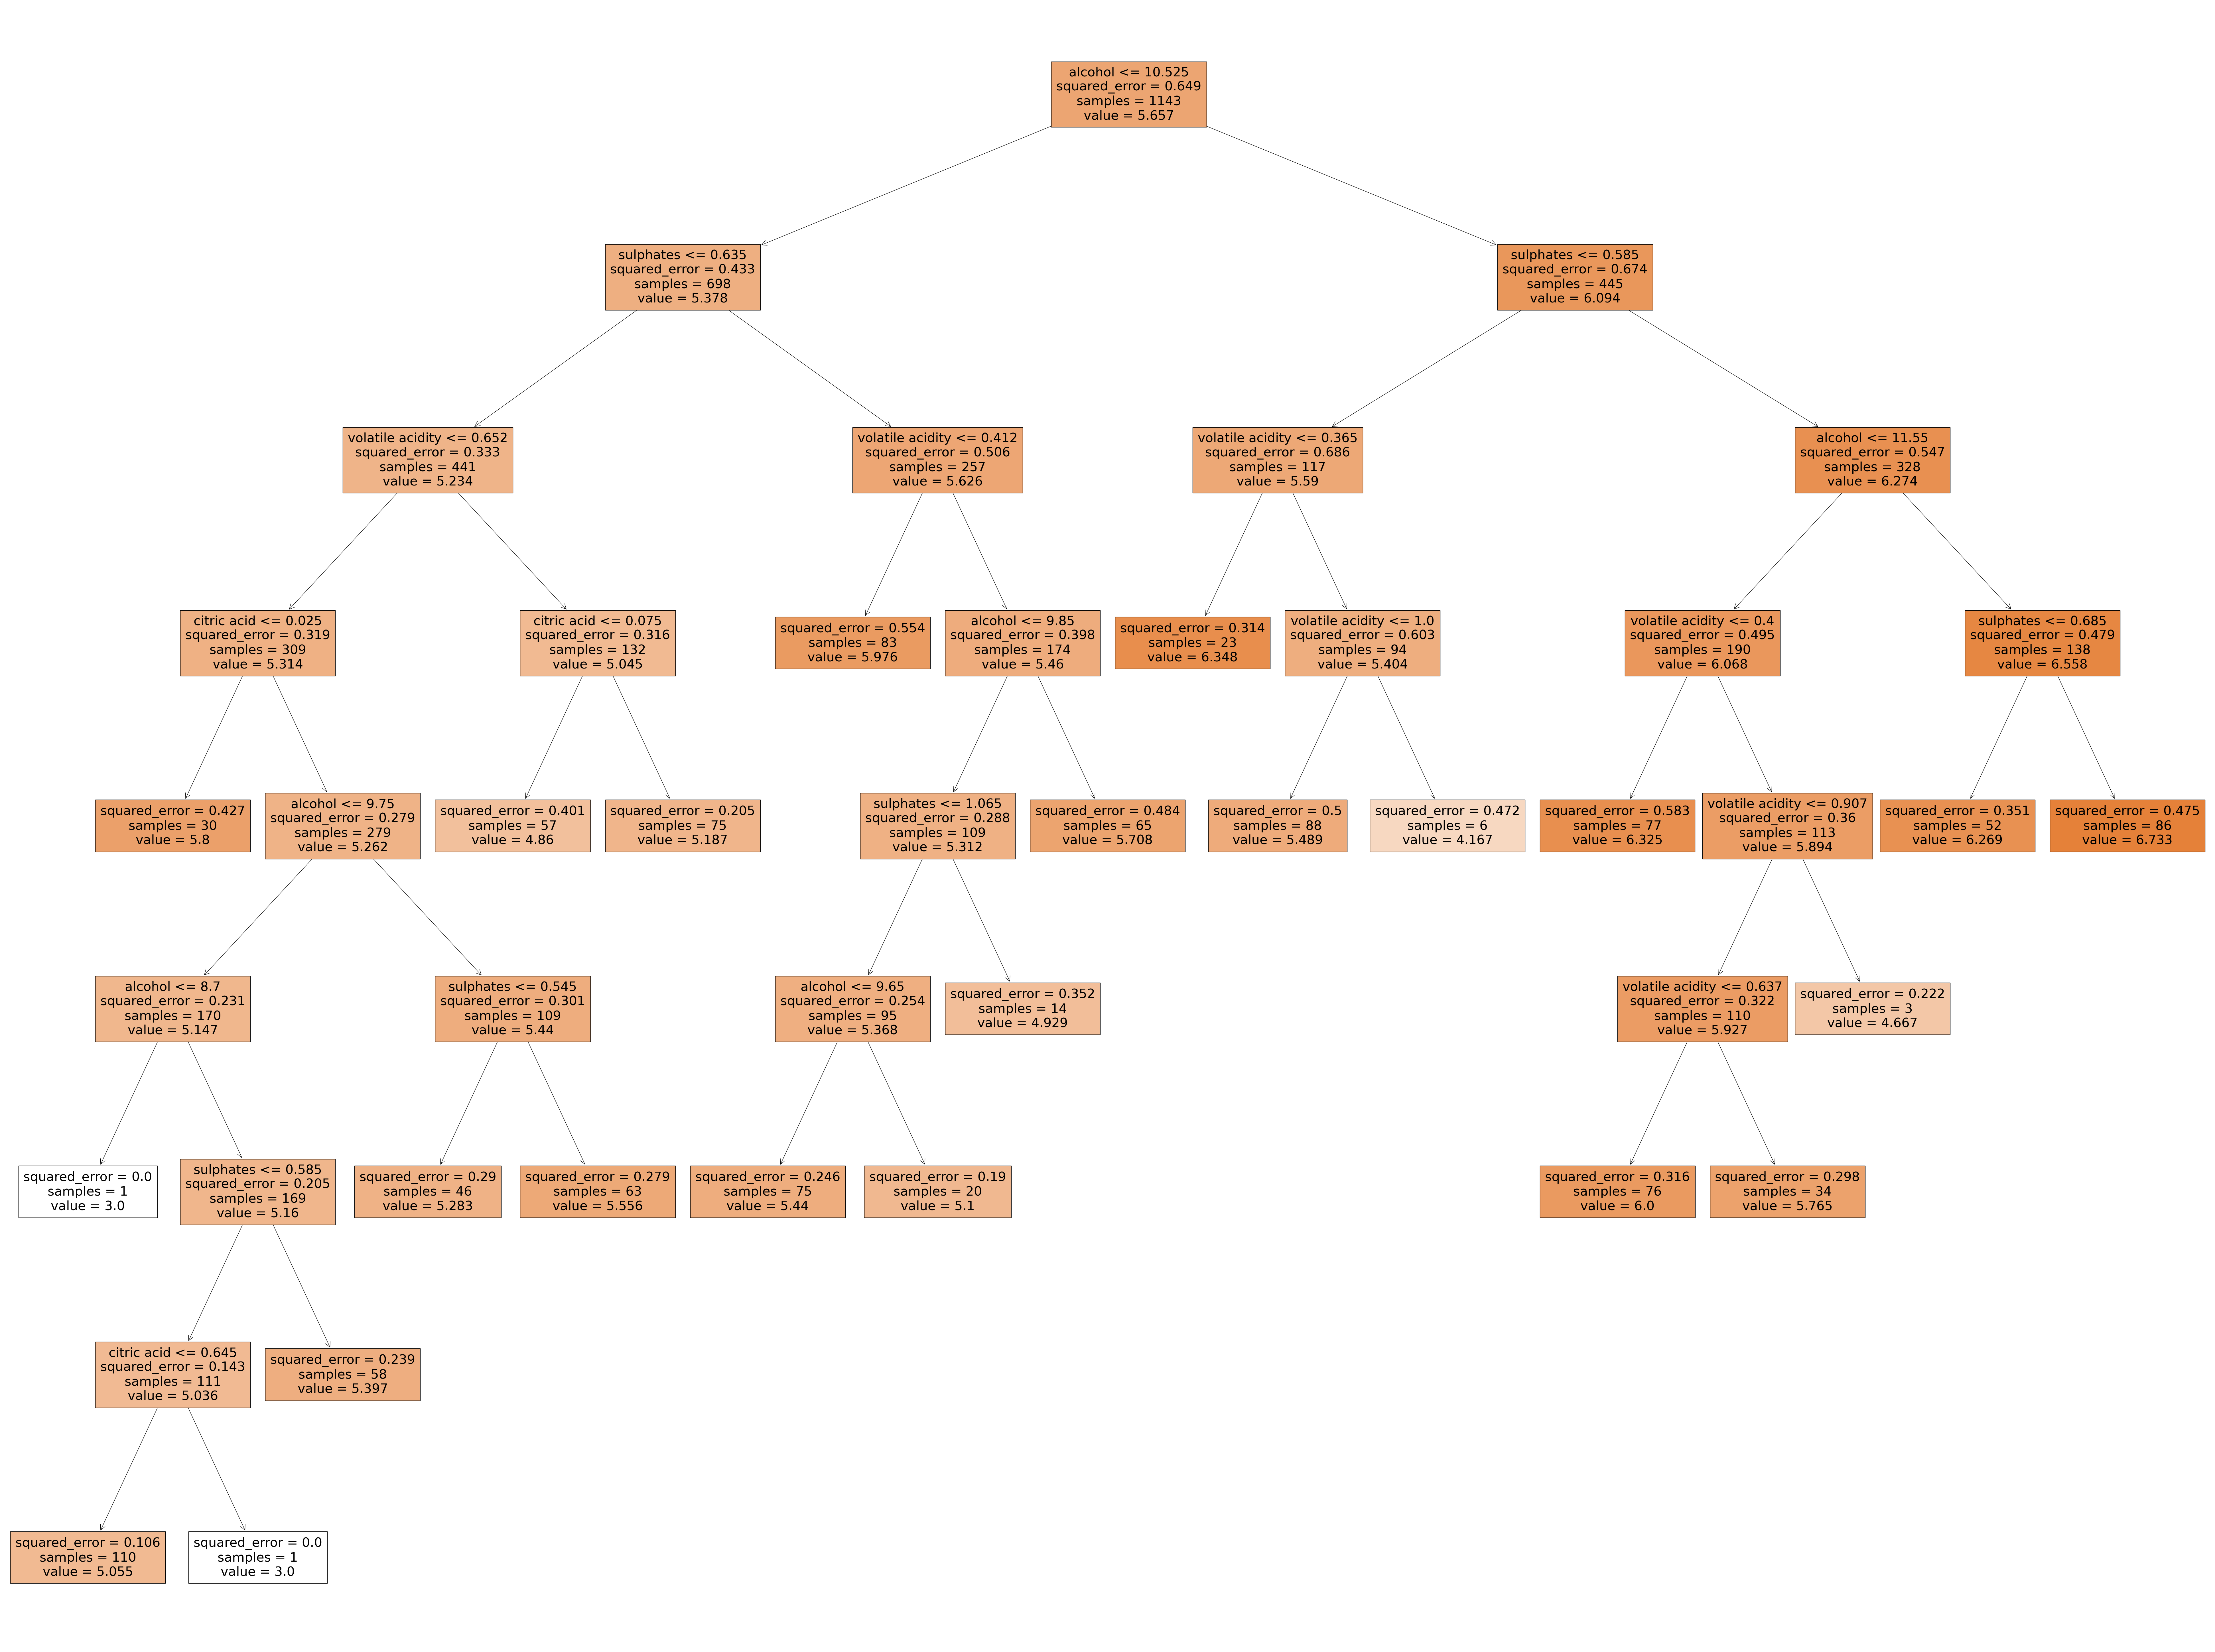

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(100,75))
tree.plot_tree(model_tree,feature_names=X.columns,filled=True)

In [ ]:
model_lin.coef_
# 'alcohol', 'sulphates', 'volatile acidity', 'citric acid'

# największy wpływ i jednocześnie negatywny na ocenę jakości wina ma volatile acidity (kwasowość lotna - stężenie octowego w winie)
# najmniejszy wpływ z badanych parametrów ma zawartość kwasu cytrynowego

#przy zwiększaniu stęzenia alkoholu o 1 punkt procentowy ocena jakości wina wzrasta o 0.31
#przy zwiększaniu stęzenia siarczanów o 1 punkt procentowy ocena jakości wina wzrasta o 0.69
#przy zwiększaniu stęzenia stężenia kwasu octowego o 1 punkt procentowy ocena jakości wina spada o 1.29
#przy zwiększaniu stęzenia kwasu cytrynowego o 1 punkt procentowy ocena jakości wina spada o 0.02

array([ 0.30795161,  0.66873952, -1.2897924 , -0.02632209])